<a href="https://colab.research.google.com/github/anoopaiml/AppliedAI/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Auto Encoder Implementation**

https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726

Example of the input/output image from the MNIST dataset to an autoencoder

## Autoencoder Components:
# Autoencoders consists of 4 main parts:
## 1- Encoder: In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.
## 2- Bottleneck: which is the layer that contains the compressed representation of the input data. This is the lowest possible dimensions of the input data.
## 3- Decoder: In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.
## 4- Reconstruction Loss: This is the method that measures measure how well the decoder is performing and how close the output is to the original input.



In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
print(x_test.shape)
print(train_x.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 784)
(60000, 28, 28)
(60000,)


In [5]:
autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))

In [6]:
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 5s 89us/step - loss: 0.0741 - val_loss: 0.0473
Epoch 2/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0397 - val_loss: 0.0339
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0310 - val_loss: 0.0279
Epoch 4/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0271 - val_loss: 0.0252
Epoch 5/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0248 - val_loss: 0.0233
Epoch 6/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0230 - val_loss: 0.0218
Epoch 7/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0217 - val_loss: 0.0208
Epoch 8/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0207 - val_loss: 0.0199
Epoch 9/10
60000/60000 [==============================] - 1s 15us/step - loss: 0.0199 - val_loss: 0.0

In [0]:
# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

In [8]:
%matplotlib inline
from keras.preprocessing import image
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img("/content/mario.png", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
print(inputs.shape)
print(train_x.shape)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

(1, 784)
(60000, 784)
[5329.1064]


(28, 28, 1)
[1954.0082]


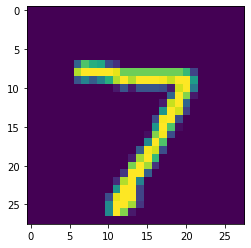

In [15]:
%matplotlib inline
from keras.preprocessing import image
import matplotlib.pyplot as plt
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img("/content/SEVEN.png", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img)
print(input_img.shape)
plt.imshow(img)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

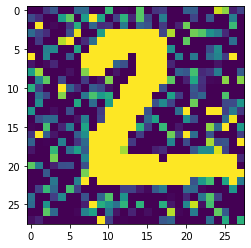

In [17]:
# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
input_img = Input(shape=(28,28,1))
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

In [0]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [33]:
print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)
x_train_noisy=x_train_noisy.reshape(60000,28,28)
x_test_noisy=x_test_noisy.reshape(60000,28,28)
print(x_train_noisy)
print(x_test_noisy)

(60000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28)
(10000, 28, 28, 1)


ValueError: ignored

In [34]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train_noisy,
                epochs=50,
                batch_size=256,
                validation_data=(x_test_noisy, x_test_noisy))

ValueError: ignored